In [1]:
import sys
sys.path.append("../../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F

import glob
import os
from datetime import datetime
import time
import math
from tqdm import tqdm

from itertools import repeat
from torch.nn.parameter import Parameter
import collections
import matplotlib
from torch_utils import *
from ANN import MLP
from visualization import *
# matplotlib.use('Agg')

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), 
                                            std=(3*0.2023, 3*0.1994, 3*0.2010))])

cifar_dset_train = torchvision.datasets.CIFAR100('../../data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(cifar_dset_train, batch_size=20, shuffle=True, num_workers=0)

cifar_dset_test = torchvision.datasets.CIFAR100('../../data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(cifar_dset_test, batch_size=20, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
device = "cuda"
criterion = torch.nn.MSELoss().to(device)
# criterion = torch.nn.CrossEntropyLoss()
activation = F.relu
architecture = [int(32*32*3), 2000, 1000, 100]
model = MLP(architecture, activation = activation, final_layer_activation = False).to(device)

In [5]:
evaluateClassification(model, train_loader, "cuda")

Accuracy :	 0.00984


0.00984

In [6]:
# # specify optimizer (stochastic gradient descent) and learning rate
# optimizer = torch.optim.SGD(model.parameters(),lr = 0.001, momentum = 0.0)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
trn_acc_list = []
tst_acc_list = []

n_epochs = 20
for epoch_ in range(n_epochs):
    model.train()
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        y_one_hot = F.one_hot(y, num_classes=model.nc)
        optimizer.zero_grad()
        y_hat = model(x)
        #loss = criterion(y_hat,y)
        loss = criterion(y_hat,y_one_hot.to(torch.float32)) # Use this if criterion = torch.nn.MSELoss().to(device)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
    trn_acc = evaluateClassification_topk(model, train_loader, device, (1,5), False)
    tst_acc = evaluateClassification_topk(model, test_loader, device, (1,5), False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, (top {}) Train Accuracy : {}, Test Accuracy : {}".format( epoch_+1,(1,5), trn_acc, tst_acc))

2500it [00:23, 105.76it/s]
10it [00:00, 98.08it/s]

Epoch : 1, (top (1, 5)) Train Accuracy : [0.16938 0.4216 ], Test Accuracy : [0.1473 0.3817]


2500it [00:23, 104.55it/s]
11it [00:00, 109.63it/s]

Epoch : 2, (top (1, 5)) Train Accuracy : [0.2082  0.47056], Test Accuracy : [0.18   0.4297]


2500it [00:23, 106.69it/s]
12it [00:00, 112.94it/s]

Epoch : 3, (top (1, 5)) Train Accuracy : [0.24026 0.50828], Test Accuracy : [0.1979 0.4433]


2500it [00:23, 108.66it/s]
11it [00:00, 105.60it/s]

Epoch : 4, (top (1, 5)) Train Accuracy : [0.26868 0.53452], Test Accuracy : [0.2097 0.4509]


2500it [00:24, 102.32it/s]
11it [00:00, 107.43it/s]

Epoch : 5, (top (1, 5)) Train Accuracy : [0.3071 0.5685], Test Accuracy : [0.2291 0.4686]


2500it [00:23, 105.31it/s]
11it [00:00, 109.95it/s]

Epoch : 6, (top (1, 5)) Train Accuracy : [0.33318 0.58128], Test Accuracy : [0.2363 0.4641]


2500it [00:24, 103.30it/s]
10it [00:00, 98.24it/s]

Epoch : 7, (top (1, 5)) Train Accuracy : [0.35442 0.59852], Test Accuracy : [0.238  0.4656]


2500it [00:24, 104.16it/s]
11it [00:00, 99.49it/s]

Epoch : 8, (top (1, 5)) Train Accuracy : [0.38186 0.60834], Test Accuracy : [0.2412 0.4705]


2500it [00:25, 99.01it/s] 
10it [00:00, 97.16it/s]

Epoch : 9, (top (1, 5)) Train Accuracy : [0.41394 0.6224 ], Test Accuracy : [0.2512 0.4726]


2500it [00:24, 102.87it/s]
11it [00:00, 98.95it/s]

Epoch : 10, (top (1, 5)) Train Accuracy : [0.43066 0.62878], Test Accuracy : [0.2493 0.4652]


2500it [00:24, 103.18it/s]
10it [00:00, 87.92it/s]

Epoch : 11, (top (1, 5)) Train Accuracy : [0.45482 0.64718], Test Accuracy : [0.2512 0.4616]


2500it [00:24, 102.21it/s]
11it [00:00, 95.89it/s]

Epoch : 12, (top (1, 5)) Train Accuracy : [0.4673  0.65148], Test Accuracy : [0.2545 0.4664]


2500it [00:24, 103.39it/s]
10it [00:00, 95.19it/s]

Epoch : 13, (top (1, 5)) Train Accuracy : [0.49064 0.65558], Test Accuracy : [0.2517 0.4474]


2500it [00:24, 103.53it/s]
10it [00:00, 99.48it/s]

Epoch : 14, (top (1, 5)) Train Accuracy : [0.49962 0.6625 ], Test Accuracy : [0.2557 0.4608]


2500it [00:23, 104.42it/s]
10it [00:00, 97.52it/s]

Epoch : 15, (top (1, 5)) Train Accuracy : [0.51286 0.67174], Test Accuracy : [0.256  0.4575]


2500it [00:23, 104.18it/s]
11it [00:00, 108.29it/s]

Epoch : 16, (top (1, 5)) Train Accuracy : [0.52074 0.67326], Test Accuracy : [0.2546 0.4457]


2500it [00:20, 124.62it/s]
21it [00:00, 209.02it/s]

Epoch : 17, (top (1, 5)) Train Accuracy : [0.5329  0.67388], Test Accuracy : [0.2537 0.441 ]


2500it [00:12, 205.70it/s]
21it [00:00, 208.67it/s]

Epoch : 18, (top (1, 5)) Train Accuracy : [0.54126 0.67794], Test Accuracy : [0.2528 0.4397]


2500it [00:12, 207.37it/s]
20it [00:00, 195.79it/s]

Epoch : 19, (top (1, 5)) Train Accuracy : [0.54954 0.67966], Test Accuracy : [0.2549 0.4354]


2500it [00:12, 204.32it/s]


Epoch : 20, (top (1, 5)) Train Accuracy : [0.55542 0.68638], Test Accuracy : [0.256  0.4337]


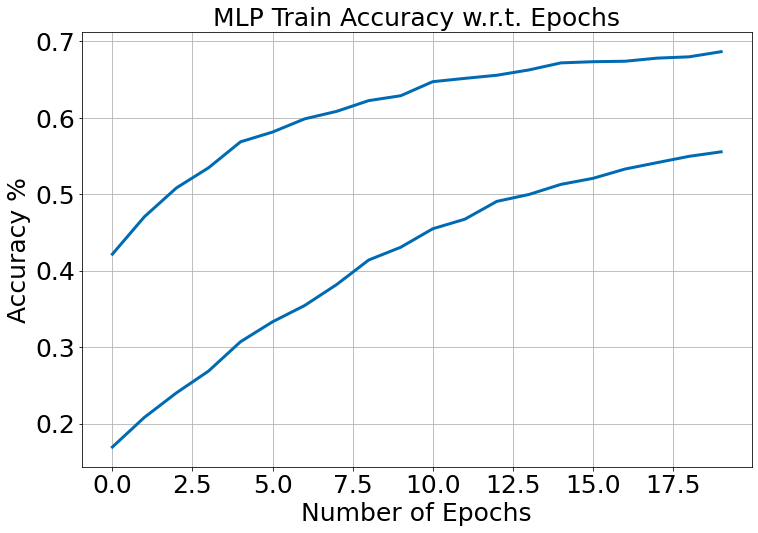

In [7]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

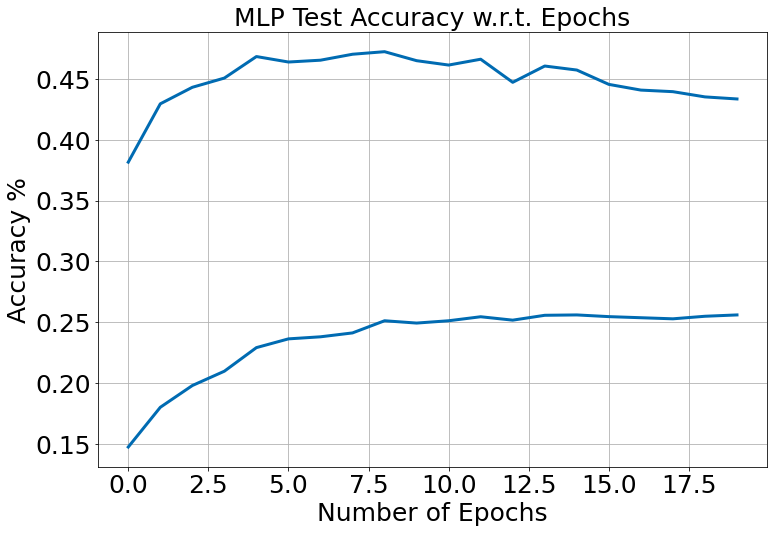

In [8]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

In [9]:
def evaluateClassification_topk(model, loader, device, topk = (1,), printing = True):
    # Evaluate Artificial Neural Network on Classification Task
    model.eval()
    correct = 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        
        y_hat = model(x)
        
        pred = torch.argmax(y_hat, dim=1)#.squeeze()  
        correct += topk_accuracy(y_hat.T, y, topk)[1]

    acc = correct/len(loader.dataset) 
    if printing:
        print('Accuracy :\t', acc)   
    return acc

In [10]:
evaluateClassification_topk(model, train_loader, device, (1,5), False)

array([0.55542, 0.68638])